# Mobility of Communities in India during COVID-19

## Motivation
In this notebook we are interested to answer this question - "How has the movement of people changed with the implementation of lockdown measures in India?". To do so, we looked at Google's **COVID-19 Community Mobility Report**

## Background information
In India, community lockdown measures were imposed to prevent the movement of people and mitigate the spread in the novel coronovirus. Phase 1 of the nation-wide lockdown was imposed from 22-March till 14-April, and subsequently four phases of lockdown and 2 phases of nation-wide unlockdown have been implemented as on date. 

In a community lockdown, the movement of people is severily restricted to only essential service providers. Residents are asked to stay within their homes and work from home. The only movement allowed for the reisdents are to nearby groceries and markets to buy essential goods. All other retail outlets and locations that draw large crowds were closed. Public transport was limited and people were encouraged to use their own vehicles, albeit in a limited manner. 

With time, the severity of the restrictions were eased across the country, with certain cities choosing to continue the strict measures to battle rising infected cases in various pockets. 

Our interest is to know the impact each Phase of the lockdown had on the mobility of people. The mobility of the people refers to movement of individuals to and from different places in their cities. This data is obtained from the freely available **COVID-19 Community Mobility Report** collated by Google. 

## Some information about the data
This report aggregates the mobility of communities to different categories of places such as retail outlets, recreation facilities, groceris, pharmacies, parks, transit stations, workplaces and residences. According to their documentation, each data represents a percentage change in the number of visitors to a given place. This percentage change is with respect to the baseline number. 

The baseline number of visitors to each place is the median value of the data for each day between Jan 3 and Feb 6, 2020. This is a 5 week period and the median number of visitors to each location is estimated for each day of the week. 

*For example, if the number of visitors to a retail store, every Friday, were 1000 (Jan 3), 1200 (Jan 10), 800 (Jan 17), 1100 (Jan 24) and 1400 (Jan 31). Then the baseline number of visitors to that given store on a Friday would be 1100. And if the number of visitors to that store on a April 3 (DUring lockdown) was 200, then the percentage change in the number of visitors on Apri 3 would be -81.8%.*

As stated in their documentation - **We calculate these insights based on data from users who have opted-in to Location History for their Google Account, so the data represents a sample of our users. As with all samples, this may or may not represent the exact behavior of a wider population.**

# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import requests

%matplotlib inline
plt.style.use('bmh')

In [5]:
print('pandas: {}'.format(pd.__version__))
print('numpy: {}'.format(np.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('seaborn: {}'.format(sns.__version__))
print('requests: {}'.format(requests.__version__))

pandas: 1.0.5
numpy: 1.18.5
matplotlib: 3.2.2
seaborn: 0.10.1
requests: 2.24.0


***
# 1. Data Gathering
***

### a) Acquiring Community Mobility data

The data is freely available at https://www.google.com/covid19/mobility/index.html?hl=en
This data is updated everyday for a large number of countries around the world.
The CSV file is available for download. I downloaded the file and saved it in my local directory to read into a dataframe

In [6]:
df = pd.read_csv('Global_Mobility_Report.csv')

/Users/anirudhchandra/anaconda3/envs/prob_prog/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### b) Acquiring COVID-19 daily case data

Reading in the .json file from covid19india.org API

In [7]:
response = requests.get('https://api.covid19india.org/states_daily.json')
print(response.status_code)

200


In [8]:
data = response.json()
maha = pd.DataFrame({'dates':[x['date'] for x in data['states_daily']], 
                            'cases':[x['mh'] for x in data['states_daily']],
                            'status':[x['status'] for x in data['states_daily']]})
delhi = pd.DataFrame({'dates':[x['date'] for x in data['states_daily']], 
                            'cases':[x['dl'] for x in data['states_daily']],
                            'status':[x['status'] for x in data['states_daily']]})

Let us see some basic information of the different features in our dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704141 entries, 0 to 704140
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 702931 non-null  object 
 1   country_region                                      704141 non-null  object 
 2   sub_region_1                                        683216 non-null  object 
 3   sub_region_2                                        406349 non-null  object 
 4   iso_3166_2_code                                     256059 non-null  object 
 5   census_fips_code                                    406505 non-null  float64
 6   date                                                704141 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  535567 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   510485 non-n

We have two types of data - objects and floats. The dataset provides country-wise and sub-region-wise change in visitors numbers for the following categories of locations - 
1. Retail and Recreation Facilities
2. Grocery and Pharmacies
3. Parks
4. Transit Stations
5. Workplaces
6. Residential buildings

My interest in this study is to assess the mobility of people for Maharashtra and Delhi which have > 1 lakh confirmed postive cases. This corresponds to nearly 150, or ~5 months of data from (February 15 to July 17)

In [10]:
maha['cases'] = maha['cases'].apply(lambda x: int(x))
delhi['cases'] = delhi['cases'].apply(lambda x: int(x))

***
# 2. Data Preprocessing
***

### a) Extracting India dataset from Global dataset

In [11]:
india = df.loc[df['country_region']=='India']

### b) Creating the dataframe variable for Maharashtra and Delhi

In [12]:
mobility_df = india.loc[(india['sub_region_1']=='Maharashtra')|
                (india['sub_region_1']=='Delhi')]

### c) Creating the dataframe for confirmed COVID-19 cases in Maharashtra and Delhi

In [13]:
mahadf = maha.loc[maha['status']=='Confirmed'].drop(columns=['status'])
delhidf = delhi.loc[delhi['status']=='Confirmed'].drop(columns=['status'])

### d) Retaining relevent features

In [14]:
mobility_df = mobility_df[['sub_region_1','date',
        'retail_and_recreation_percent_change_from_baseline',
        'grocery_and_pharmacy_percent_change_from_baseline',
        'parks_percent_change_from_baseline',
        'transit_stations_percent_change_from_baseline',
        'workplaces_percent_change_from_baseline',
        'residential_percent_change_from_baseline']]

In [15]:
mobility_df = mobility_df.rename(columns={'sub_region_1':'state',
                          'retail_and_recreation_percent_change_from_baseline':'retail_and_recreation',
                          'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy',
                          'parks_percent_change_from_baseline':'parks',
                          'transit_stations_percent_change_from_baseline':'transit_stations',
                          'workplaces_percent_change_from_baseline':'workplaces',
                          'residential_percent_change_from_baseline':'residences'})

### d) Reset dataframe index to date

In [16]:
mobility_df['date'] = pd.to_datetime(mobility_df['date'])
mobility_df = mobility_df.set_index('date')

In [17]:
mahadf['dates'] = pd.to_datetime(mahadf['dates'])
delhidf['dates'] = pd.to_datetime(delhidf['dates'])

mahadf = mahadf.set_index('dates')
delhidf = delhidf.set_index('dates')

### e) New feature to separate pre and post lockdown data

In [18]:
mobility_df.loc[mobility_df.index<'2020-03-22', 'lockdown_status'] = 'pre_lockdown'
mobility_df.loc[mobility_df.index>='2020-03-22', 'lockdown_status'] = 'during_lockdown'

### f) New feature containing day of the week

In [19]:
mobility_df['day_of_the_week'] = [calendar.day_name[x] for x in mobility_df.index.weekday]

***
# 3. Exploratory Data Analysis
***

### a) Aggregate Statistics

Here I wanted a few statistics that could summarise the %change in the population numbers. I used the following summary statistics - 
1. Mean
2. Min
3. Max
4. Median

In [20]:
mobility_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 312 entries, 2020-02-15 to 2020-07-19
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   state                  312 non-null    object 
 1   retail_and_recreation  312 non-null    float64
 2   grocery_and_pharmacy   312 non-null    float64
 3   parks                  312 non-null    float64
 4   transit_stations       312 non-null    float64
 5   workplaces             312 non-null    float64
 6   residences             312 non-null    float64
 7   lockdown_status        312 non-null    object 
 8   day_of_the_week        312 non-null    object 
dtypes: float64(6), object(3)
memory usage: 24.4+ KB


<font color=blue>**Note:**</font>
- We can see that there are no null values in the mobility dataset.
- The data starts from 15 Feb and is up to 17 July 2020.

In [21]:
print(mahadf.info())
print(delhidf.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2020-03-14 to 2020-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   133 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 133 entries, 2020-03-14 to 2020-07-24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   cases   133 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB
None


<font color=blue>**Note:**</font>
- We can see that there are no null values in the covid dataset.
- The data starts from 14 March and is up to 24 July 2020.

In [22]:
mobility_df.loc[mobility_df['lockdown_status']=='during_lockdown'].groupby('state').mean().round()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residences
state,,,,,,
Delhi,-75.0,-47.0,-87.0,-70.0,-61.0,26.0
Maharashtra,-78.0,-40.0,-69.0,-66.0,-59.0,29.0


In [23]:
mobility_df.loc[mobility_df['lockdown_status']=='during_lockdown'].groupby('state').min().round()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residences,lockdown_status,day_of_the_week
state,,,,,,,,
Delhi,-91.0,-83.0,-98.0,-88.0,-85.0,13.0,during_lockdown,Friday
Maharashtra,-89.0,-84.0,-79.0,-81.0,-81.0,15.0,during_lockdown,Friday


In [24]:
mobility_df.loc[mobility_df['lockdown_status']=='during_lockdown'].groupby('state').max().round()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residences,lockdown_status,day_of_the_week
state,,,,,,,,
Delhi,-56.0,-22.0,-58.0,-52.0,-27.0,37.0,during_lockdown,Wednesday
Maharashtra,-65.0,-13.0,-51.0,-52.0,-23.0,39.0,during_lockdown,Wednesday


In [25]:
mobility_df.loc[mobility_df['lockdown_status']=='during_lockdown'].groupby('state').median().round()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residences
state,,,,,,
Delhi,-76.0,-42.0,-87.0,-66.0,-58.0,24.0
Maharashtra,-80.0,-38.0,-70.0,-66.0,-58.0,28.0


<font color=red>**Observations -**</font>
1. We observe that the average %change in pop number to retail and recreation facilities is similar to the two States and the drop of nearly 75-78% is very large.
2. Delhi saw a greater average drop in visitors to parks (87%) than Maharashtra during the lockdown
3. The lockdown ensured that the people stayed at home in their residences and this is seen in the increase of 26 and 29% respectively. The maximum increase was 37 and 39% more than in pre-lockdown months of Jan-Feb.
4. The groceries and pharmacies saw significantly lower drops in visitors than other locations because these were part of the essential services.

### b) Plotting the aggregate statistics for the states

In [26]:
# Helper Function to plot Summary Statistics

def summary_statistic_plotter(plotdf, title):
    fig,ax = plt.subplots(figsize=[15,6])
    plotdf = plotdf.transpose()

    barwidth = 0.2

    p1 = np.arange(len(plotdf))
    p2 = [x + barwidth for x in p1]

    ax.bar(p1,plotdf['Maharashtra'], width=barwidth, color='darkorange', edgecolor='white', label='Maharashtra')
    ax.bar(p2,plotdf['Delhi'], width=barwidth, color='darkgreen',edgecolor='white', label='Delhi')
    
    plt.xticks(p2, ['Retail & Recreation', 
                    'Grocery & Pharmacy',
                    'Parks',
                    'Transit Stations', 
                    'Workplaces',
                    'Residential Buildings'])
    ax.set_title(title)
    ax.hlines(0, -0.1, 5.5, linestyle='--')
    
    #setting ylimits
    ymin = plotdf.min().min()
    ymax = plotdf.max().max()
    ax.set_ylim(ymin, ymax)
    
    ax.set_ylabel('% change in mobility')
    
    ax.legend()

Comparing the drop/increase in mobility to different locations, amongst the three States (For the duration of the dataset)

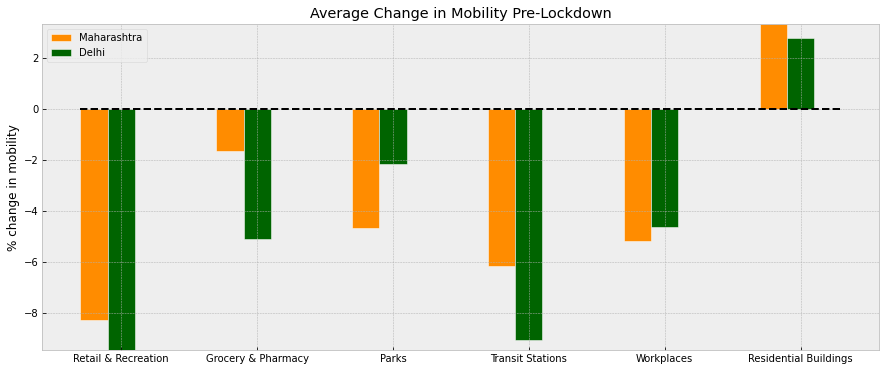

In [45]:
# Observing pre-lockdown trends
temp = mobility_df.loc[mobility_df['lockdown_status']=='pre_lockdown'].groupby('state')
summary_statistic_plotter(temp.mean(), 'Average Change in Mobility Pre-Lockdown')
plt.savefig('pre_lockdown_avg.png', bbox_inches='tight')

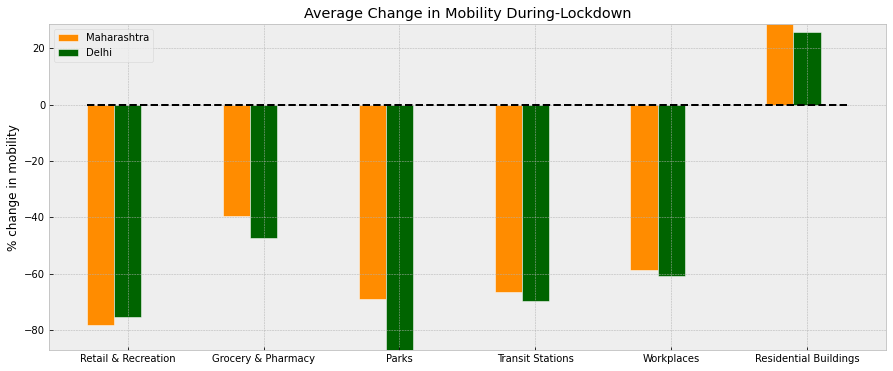

In [46]:
# Observing during-lockdown trends
temp = mobility_df.loc[mobility_df['lockdown_status']=='during_lockdown'].groupby('state')
summary_statistic_plotter(temp.mean(), 'Average Change in Mobility During-Lockdown')
plt.savefig('during_lockdown_avg.png', bbox_inches='tight')

<font color=red>**Observations -**</font>

1. The average change in number of visitors to any of the 6 categories of locations is much smaller (approximately 10 times) in the pre-lockdown than in the post-lockdown months. 
2. It is clear that there was a drop in the number of visitors during the lockdown months.
3. During the lockdown months, the average drop in number of visitors to all these locations, except retail and recreation, is highest for Delhi. 
4. Since essential services like groceries and pharmacies were allowed to be open during the lockdown, the drop in visitors to these locations is markedly less than the other locations.
5. Since lockdown entails staying at home for longer durations of the day, the average increase in number of people staying at homes (residential building) was 10 times greater than non-lockdown months. 
6. Delhi, being a city of parks and gardens, saw the largest drop in visitors to these locations compared to the baseline months. 
7. Retail and recreation facilities saw the next major drop in visitors across all the states, compared to the baseline months. 

### c) Understanding the variation in mobility change

In [29]:
temp = mobility_df.loc[mobility_df.lockdown_status=='during_lockdown'].drop(columns=['lockdown_status','day_of_the_week'])

The interquartile range would give a good idea of the spread in the data.

In [30]:
iqr = temp.groupby('state').quantile(0.75) - temp.groupby('state').quantile(0.25)
iqr

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residences
state,,,,,,
Delhi,22.0,39.0,12.25,25.0,33.0,12.25
Maharashtra,12.0,28.0,6.50,17.0,23.0,10.25


- A larger value implies a greater spread -> which in turn means that there has been an increase or decrease in the study period. 
- Delhi has consistantly a larger spread in data compared to Maharashtra which when combined with the graph implies that Delhi is showing a greater change in mobility than Maharashtra, as the lockdown is lifted.
- In terms of residences, there doesnt sseem to be too much change. 

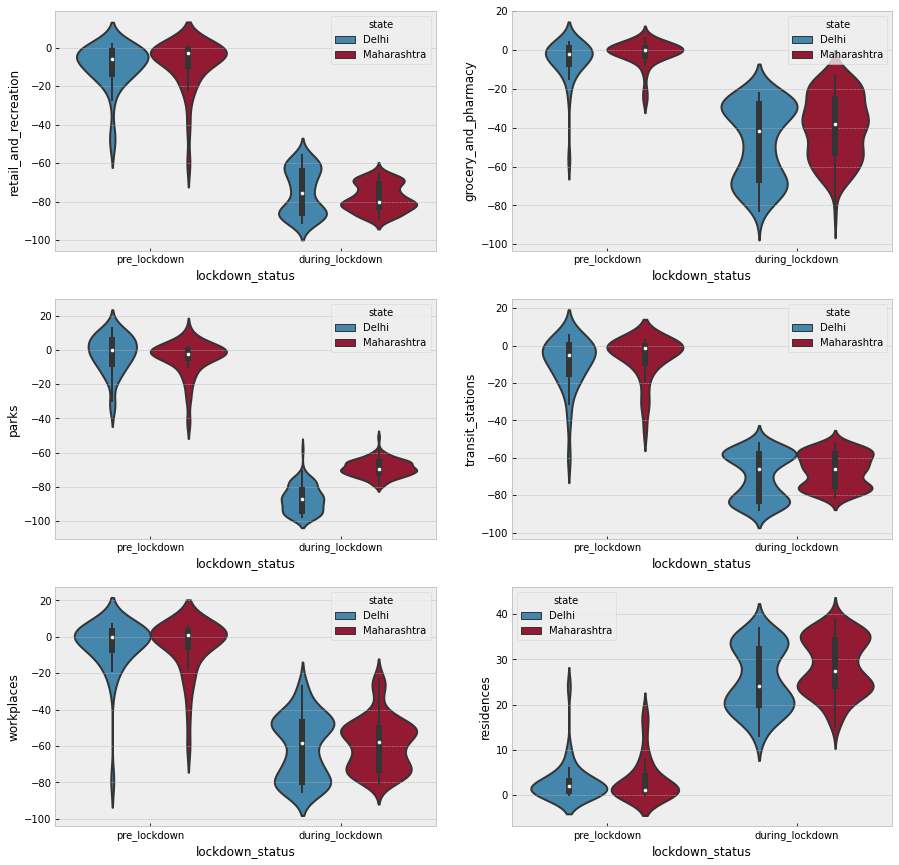

In [47]:
fig,ax = plt.subplots(3,2, figsize=[15,15])

sns.violinplot(mobility_df.lockdown_status, mobility_df.retail_and_recreation, hue=mobility_df.state, ax=ax[0,0])
sns.violinplot(mobility_df.lockdown_status, mobility_df.grocery_and_pharmacy, hue=mobility_df.state, ax=ax[0,1])
sns.violinplot(mobility_df.lockdown_status, mobility_df.parks, hue=mobility_df.state, ax=ax[1,0])
sns.violinplot(mobility_df.lockdown_status, mobility_df.transit_stations, hue=mobility_df.state, ax=ax[1,1])
sns.violinplot(mobility_df.lockdown_status, mobility_df.workplaces, hue=mobility_df.state, ax=ax[2,0])
sns.violinplot(mobility_df.lockdown_status, mobility_df.residences, hue=mobility_df.state, ax=ax[2,1])

plt.savefig('violinplot_locations.png', bbox_inches='tight')

***
# 4. Trend Analysis
***

### a) We will now plot the time-series of the %change to observe the trend for different states

In [32]:
# Defining a helper function to plot the time series of a given state

def state_grapher(wdf, state, sampling_time,  title=None):
    
    fig, ax = plt.subplots(figsize=[15,8])
    
    locations = ['retail_and_recreation','grocery_and_pharmacy',
                 'parks','transit_stations','workplaces','residences']
    
    colors = ['blue', 'green', 'red', 'teal','purple','orange']
    
    plotdf = wdf.loc[wdf['state']==state].resample(sampling_time).mean()
    
    for location, color in zip(locations, colors):
        ax.plot(plotdf.index, plotdf[location], 
                color=color, label=location, marker='o', linewidth=0.8)
        ax.legend(loc='lower left')

    ax.hlines(0, plotdf.index.min(), plotdf.index.max(), color='k',linestyle='--', alpha=0.5)   
    
    lockdown_phases = [pd.to_datetime('2020-03-22'),
                       pd.to_datetime('2020-04-15'),
                       pd.to_datetime('2020-05-04'),
                       pd.to_datetime('2020-05-18'),
                       pd.to_datetime('2020-06-01'),
                       pd.to_datetime('2020-07-01')]

    lockdown_labels = ['Lockdown 1','Lockdown 2','Lockdown 3','Lockdown 4','Unlockdown 1','Unlockdown 2']

    for phase, label in zip(lockdown_phases, lockdown_labels):
        ax.vlines(phase, -100,40, alpha=0.5, linestyle='dotted')
        ax.text(phase, 40.5, label)
        
    if title:
        ax.set_title(title, fontsize=12)

    ax.set_ylabel('% change in mobility')
    plt.show()

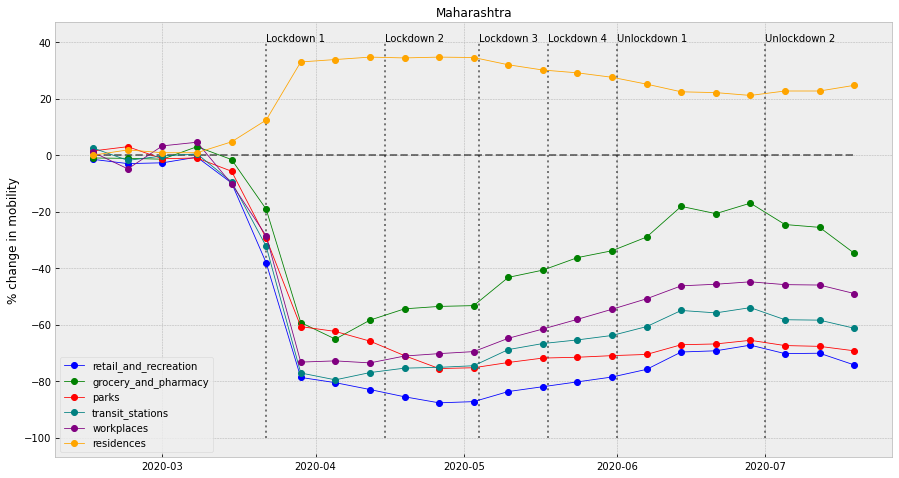

<Figure size 432x288 with 0 Axes>

In [48]:
state_grapher(mobility_df, 'Maharashtra', 'W',"Maharashtra")
plt.savefig('timeseries_maha.png', bbox_inches='tight')

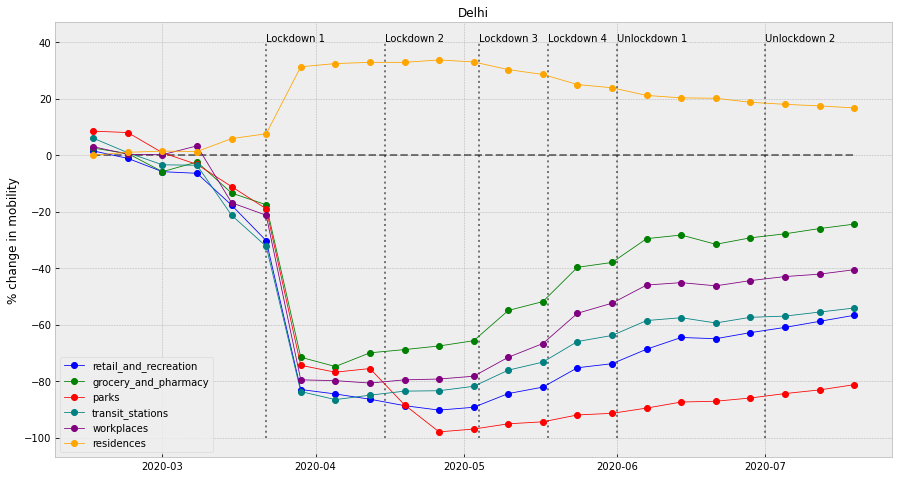

<Figure size 432x288 with 0 Axes>

In [49]:
state_grapher(mobility_df, 'Delhi','W', "Delhi")
plt.savefig('timeseries_delhi.png', bbox_inches='tight')

### b) Time-series plots for comparing states for different locations

In [37]:
# Defining a helper function to plot the time series

def location_grapher(wdf, location, sampling_time, title=None):
    
    fig, ax = plt.subplots(figsize=[15,8])
    states = ['Maharashtra','Delhi']
    colors = ['steelblue','firebrick']
    for state, color in zip(states, colors):
        plotdf = wdf.loc[wdf['state']==state].resample(sampling_time).mean()
        ax.plot(plotdf.index, plotdf[location], 
                color=color, label=state, marker='o', linewidth=0.8)
        
        ax.legend(loc='center left')

    covid_maha = mahadf.loc['2020-03-14':'2020-07-17']
    covid_delhi = delhidf.loc['2020-03-14':'2020-07-17']
    ax2 = ax.twinx()
    ax2.plot(covid_maha.cases, color='steelblue', alpha=0.2)
    ax2.fill_between(covid_maha.index, 0, covid_maha.cases, color='steelblue',alpha=0.2)
    
    ax2.plot(covid_delhi.cases, color='firebrick', alpha=0.2)
    ax2.fill_between(covid_delhi.index, 0, covid_delhi.cases, color='firebrick',alpha=0.2)
    ax2.set_ylabel('Number of confirmed +ve cases')
    ax2.grid(b=False)
    
        
    ax.hlines(0, wdf.index.min(), wdf.index.max(), color='k',linestyle='--', alpha=0.5)    
    lockdown_phases = [pd.to_datetime('2020-03-22'),
                       pd.to_datetime('2020-04-15'),
                       pd.to_datetime('2020-05-04'),
                       pd.to_datetime('2020-05-18'),
                       pd.to_datetime('2020-06-01'),
                       pd.to_datetime('2020-07-01')]

    lockdown_labels = ['Lockdown 1','Lockdown 2','Lockdown 3','Lockdown 4','Unlockdown 1','Unlockdown 2']
    
    ax.set_ylabel('% change in mobility')

    for ph, label in zip(lockdown_phases, lockdown_labels):
        ax.vlines(ph, -100,25, alpha=0.5, linestyle='dotted')
        ax.text(ph, 25.5, label)
        
    if title:
        ax.set_title(title, fontsize=12)


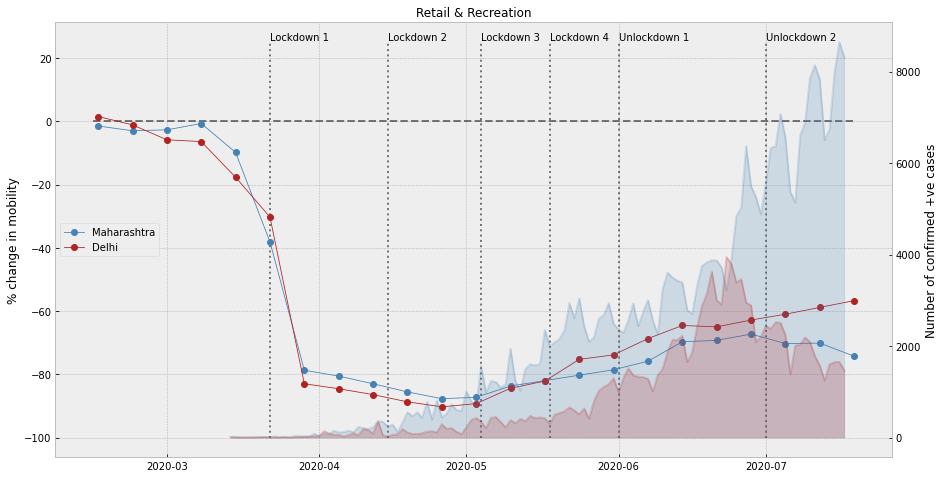

In [44]:
location_grapher(mobility_df, 'retail_and_recreation', 'W','Retail & Recreation')
plt.savefig('timeseries_retail.png', bbox_inches='tight')

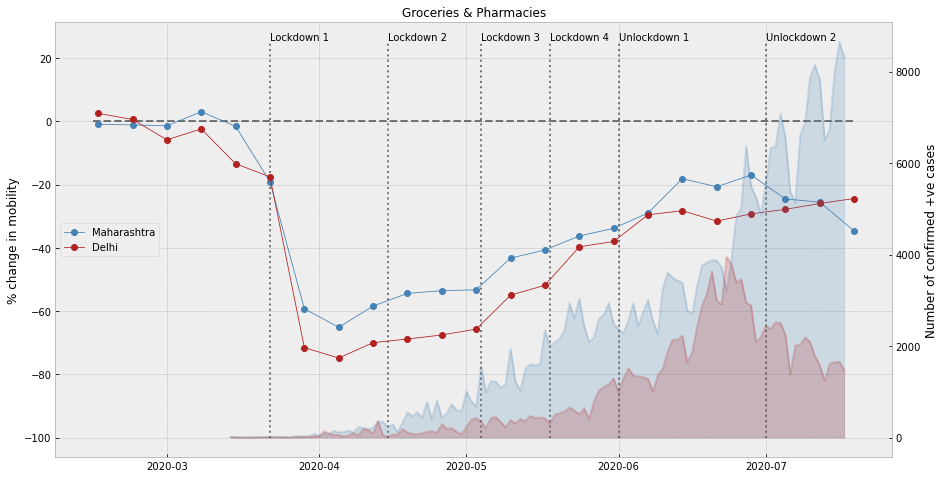

In [50]:
location_grapher(mobility_df, 'grocery_and_pharmacy','W', 'Groceries & Pharmacies')
plt.savefig('timeseries_grocery.png', bbox_inches='tight')

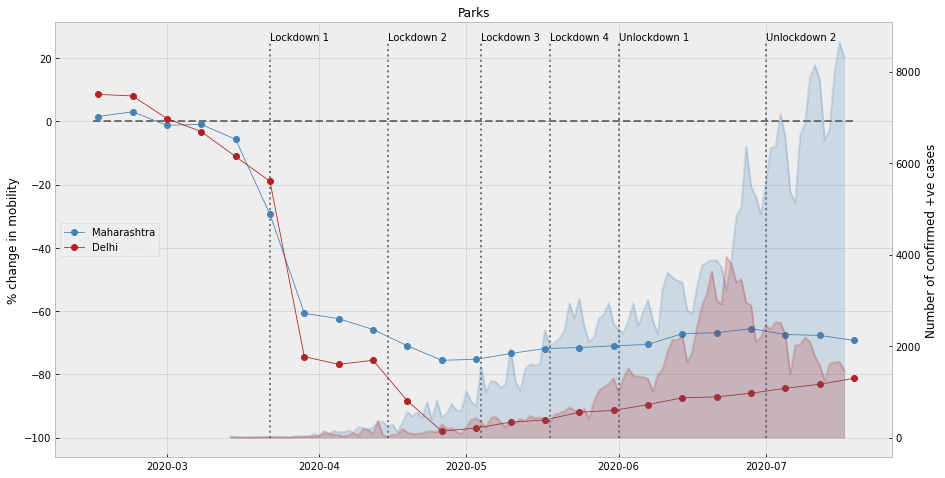

In [55]:
location_grapher(mobility_df, 'parks', 'W','Parks')
plt.savefig('timeseries_park.png', bbox_inches='tight')

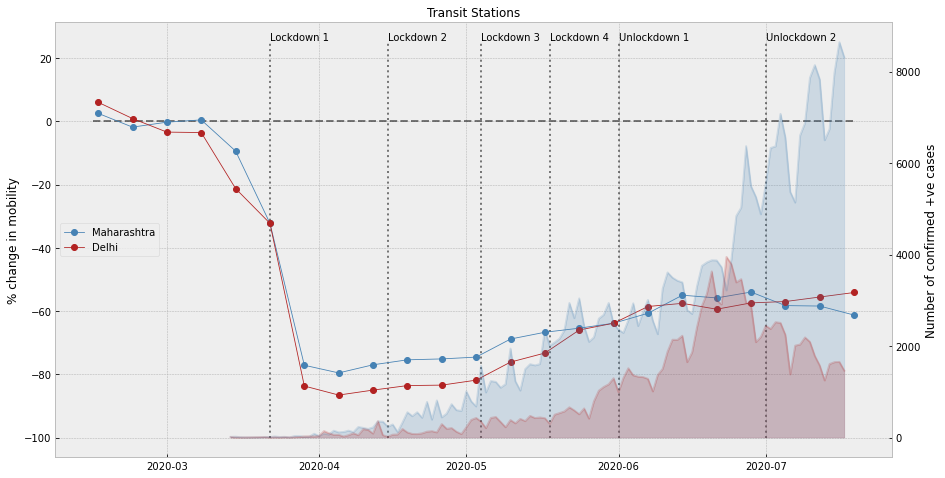

In [56]:
location_grapher(mobility_df, 'transit_stations', 'W','Transit Stations')
plt.savefig('timeseries_station.png', bbox_inches='tight')

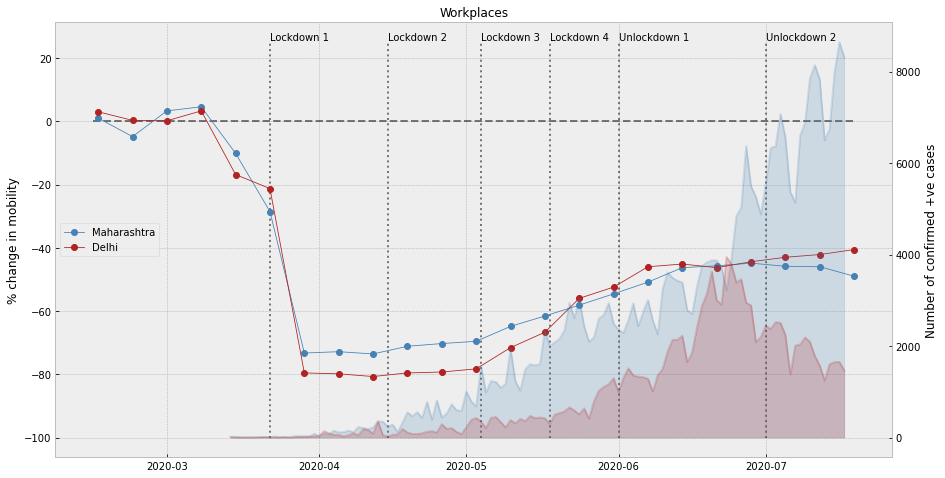

In [53]:
location_grapher(mobility_df, 'workplaces','w', 'Workplaces')
plt.savefig('timeseries_workplace.png', bbox_inches='tight')

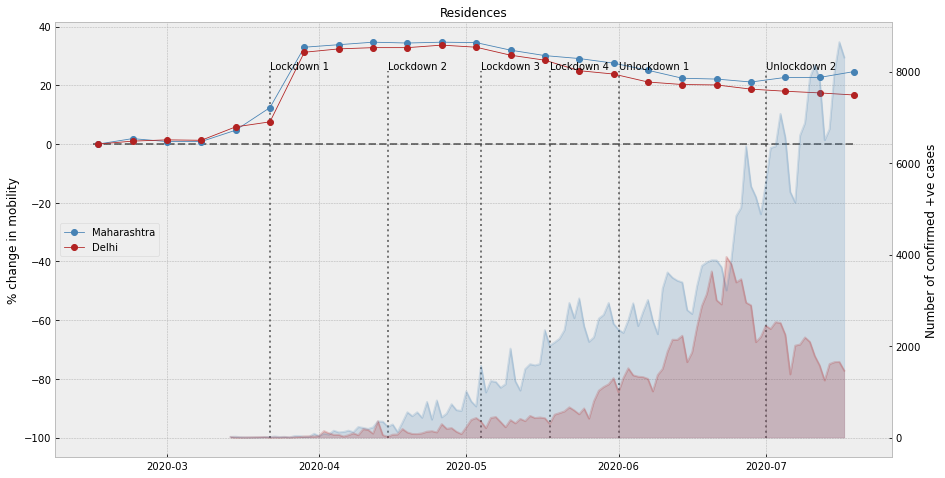

In [54]:
location_grapher(mobility_df, 'residences','W', 'Residences')
plt.savefig('timeseries_residence.png', bbox_inches='tight')